# Introduction to Python, Notebooks, XArray and data

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
# Surface temp
data_path = 'course_materials/climdat/lecture/data/CRUTEM.4.6.0.0.anomalies.nc'
ds = xr.open_dataset(data_path)
ds.temperature_anomaly.attrs['units'] = u'°C'

# NAO
data_path_nao = 'course_materials/climdat/lecture/data/nao.dat'
nao = np.loadtxt(data_path_nao)
nao = xr.DataArray(nao[nao[:, 0] >= 1850, 1:13].flatten()[:len(ds.time)],
                   coords=[('time', ds.time)],
                   name='nao')
nao = nao.where(nao != -99.99)

# SST
data_path_sst = 'course_materials/climdat/lecture/data/sst.mnmean.nc'
ds_sst = xr.open_dataset(data_path_sst)

print(ds)
print(nao)
print(ds_sst)

<xarray.Dataset>
Dimensions:              (latitude: 36, longitude: 72, time: 2029)
Coordinates:
  * latitude             (latitude) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude            (longitude) float32 -177.5 -172.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2019-01-16T12:00:00
Data variables:
    temperature_anomaly  (time, latitude, longitude) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:        CRUTEM4 temperature anomalies
    institution:  Climatic Research Unit, University of East Anglia/Met Offic...
    history:      
    source:       
    comment:      
    reference:    Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Sa...
    version:      CRUTEM.4.6.0.0
    Conventions:  CF-1.0
<xarray.DataArray 'nao' (time: 2029)>
array([-0.163,  4.134, -2.216, ..., -1.281,    nan,    nan])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2019-01-16T12:00:00
<xarray

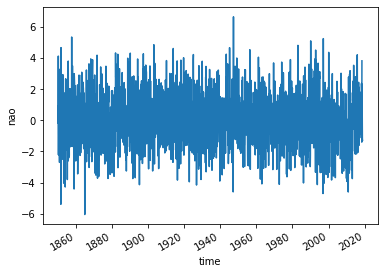

In [5]:
# Plot time series
nao.plot()

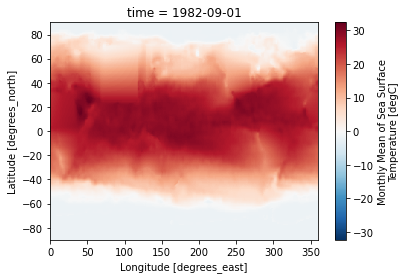

In [15]:
# Plot SST
ds_sst['sst'].isel(time=9).plot()

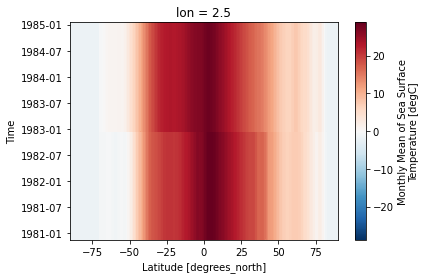

In [27]:
# trying
ds_sst['sst'].isel(lon=2,time=[0,25]).plot()

In [ ]:
# trying
ds_sst['sst'].isel(lon=2,time=[0,25]).plot()

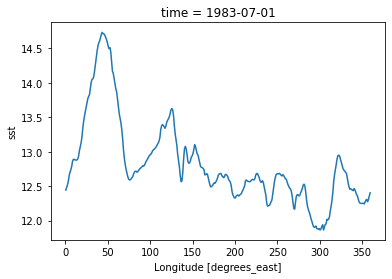

In [12]:
# trying
ds_sst['sst'].isel(time=2).mean('lat').plot()

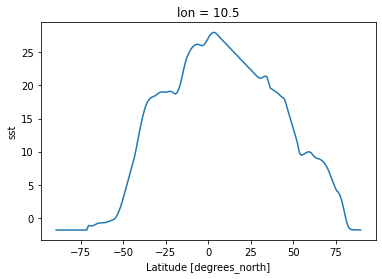

In [13]:
# trying
ds_sst['sst'].isel(lon=10).mean('time').plot()

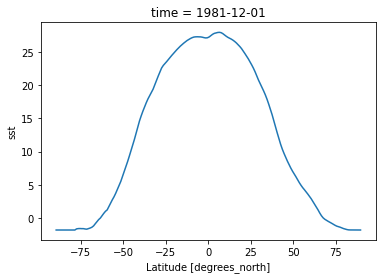

In [16]:
# Plot SST
ds_sst['sst'].isel(time=0).mean('lon').plot()

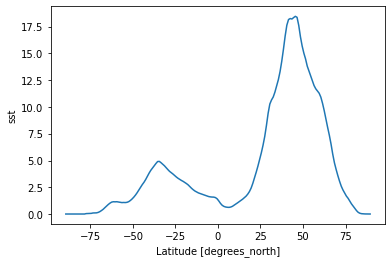

In [17]:
# Plot zonal-mean time variance
ds_sst['sst'].var('time').mean('lon').plot()